In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

df = pd.read_csv('Bank Customer Churn Prediction.csv')

df = df.drop(['customer_id'], axis=1)
display(df)
x = df.describe()
display(x)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Note: The estimated_salary low of 11.58, seems unusual. Some background information on how data is collected may be valuable. Further analysis shows that 508 members have an estimated salary below $10,000, some with relatively high balances. This is likely not a typo, perhaps some of these customers are students, unemployed, or retirees.

In [97]:
selected_rows = df[df['estimated_salary'] < 10000]
display(selected_rows )

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
23,669,France,Male,46,3,0.00,2,0,1,8487.75,0
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
84,493,France,Female,46,4,0.00,2,1,0,1907.66,0
99,413,France,Male,34,9,0.00,2,0,0,6534.18,0
...,...,...,...,...,...,...,...,...,...,...,...
9928,611,France,Male,38,4,71018.60,2,1,0,2444.29,0
9943,784,Spain,Male,23,2,0.00,1,1,1,6847.73,0
9954,645,France,Male,45,6,155417.61,1,0,1,3449.22,0
9979,677,France,Female,58,1,90022.85,1,0,1,2988.28,0


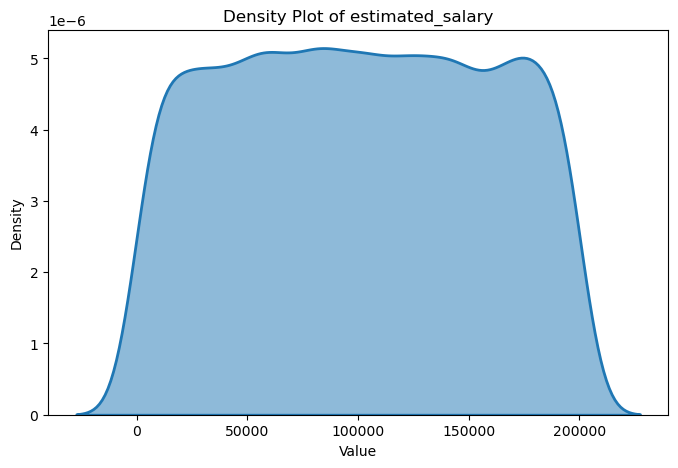

In [65]:
data = {'Value': df['estimated_salary']}
df_seaborn = pd.DataFrame(data)

# Use seaborn for enhanced density plotting
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_seaborn, x='Value', fill=True, common_norm=False, alpha=0.5, linewidth=2)

plt.title('Density Plot of estimated_salary')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

#### Further analysis shows a very flat distribution suggesting this may be a feature of the estimation formula.

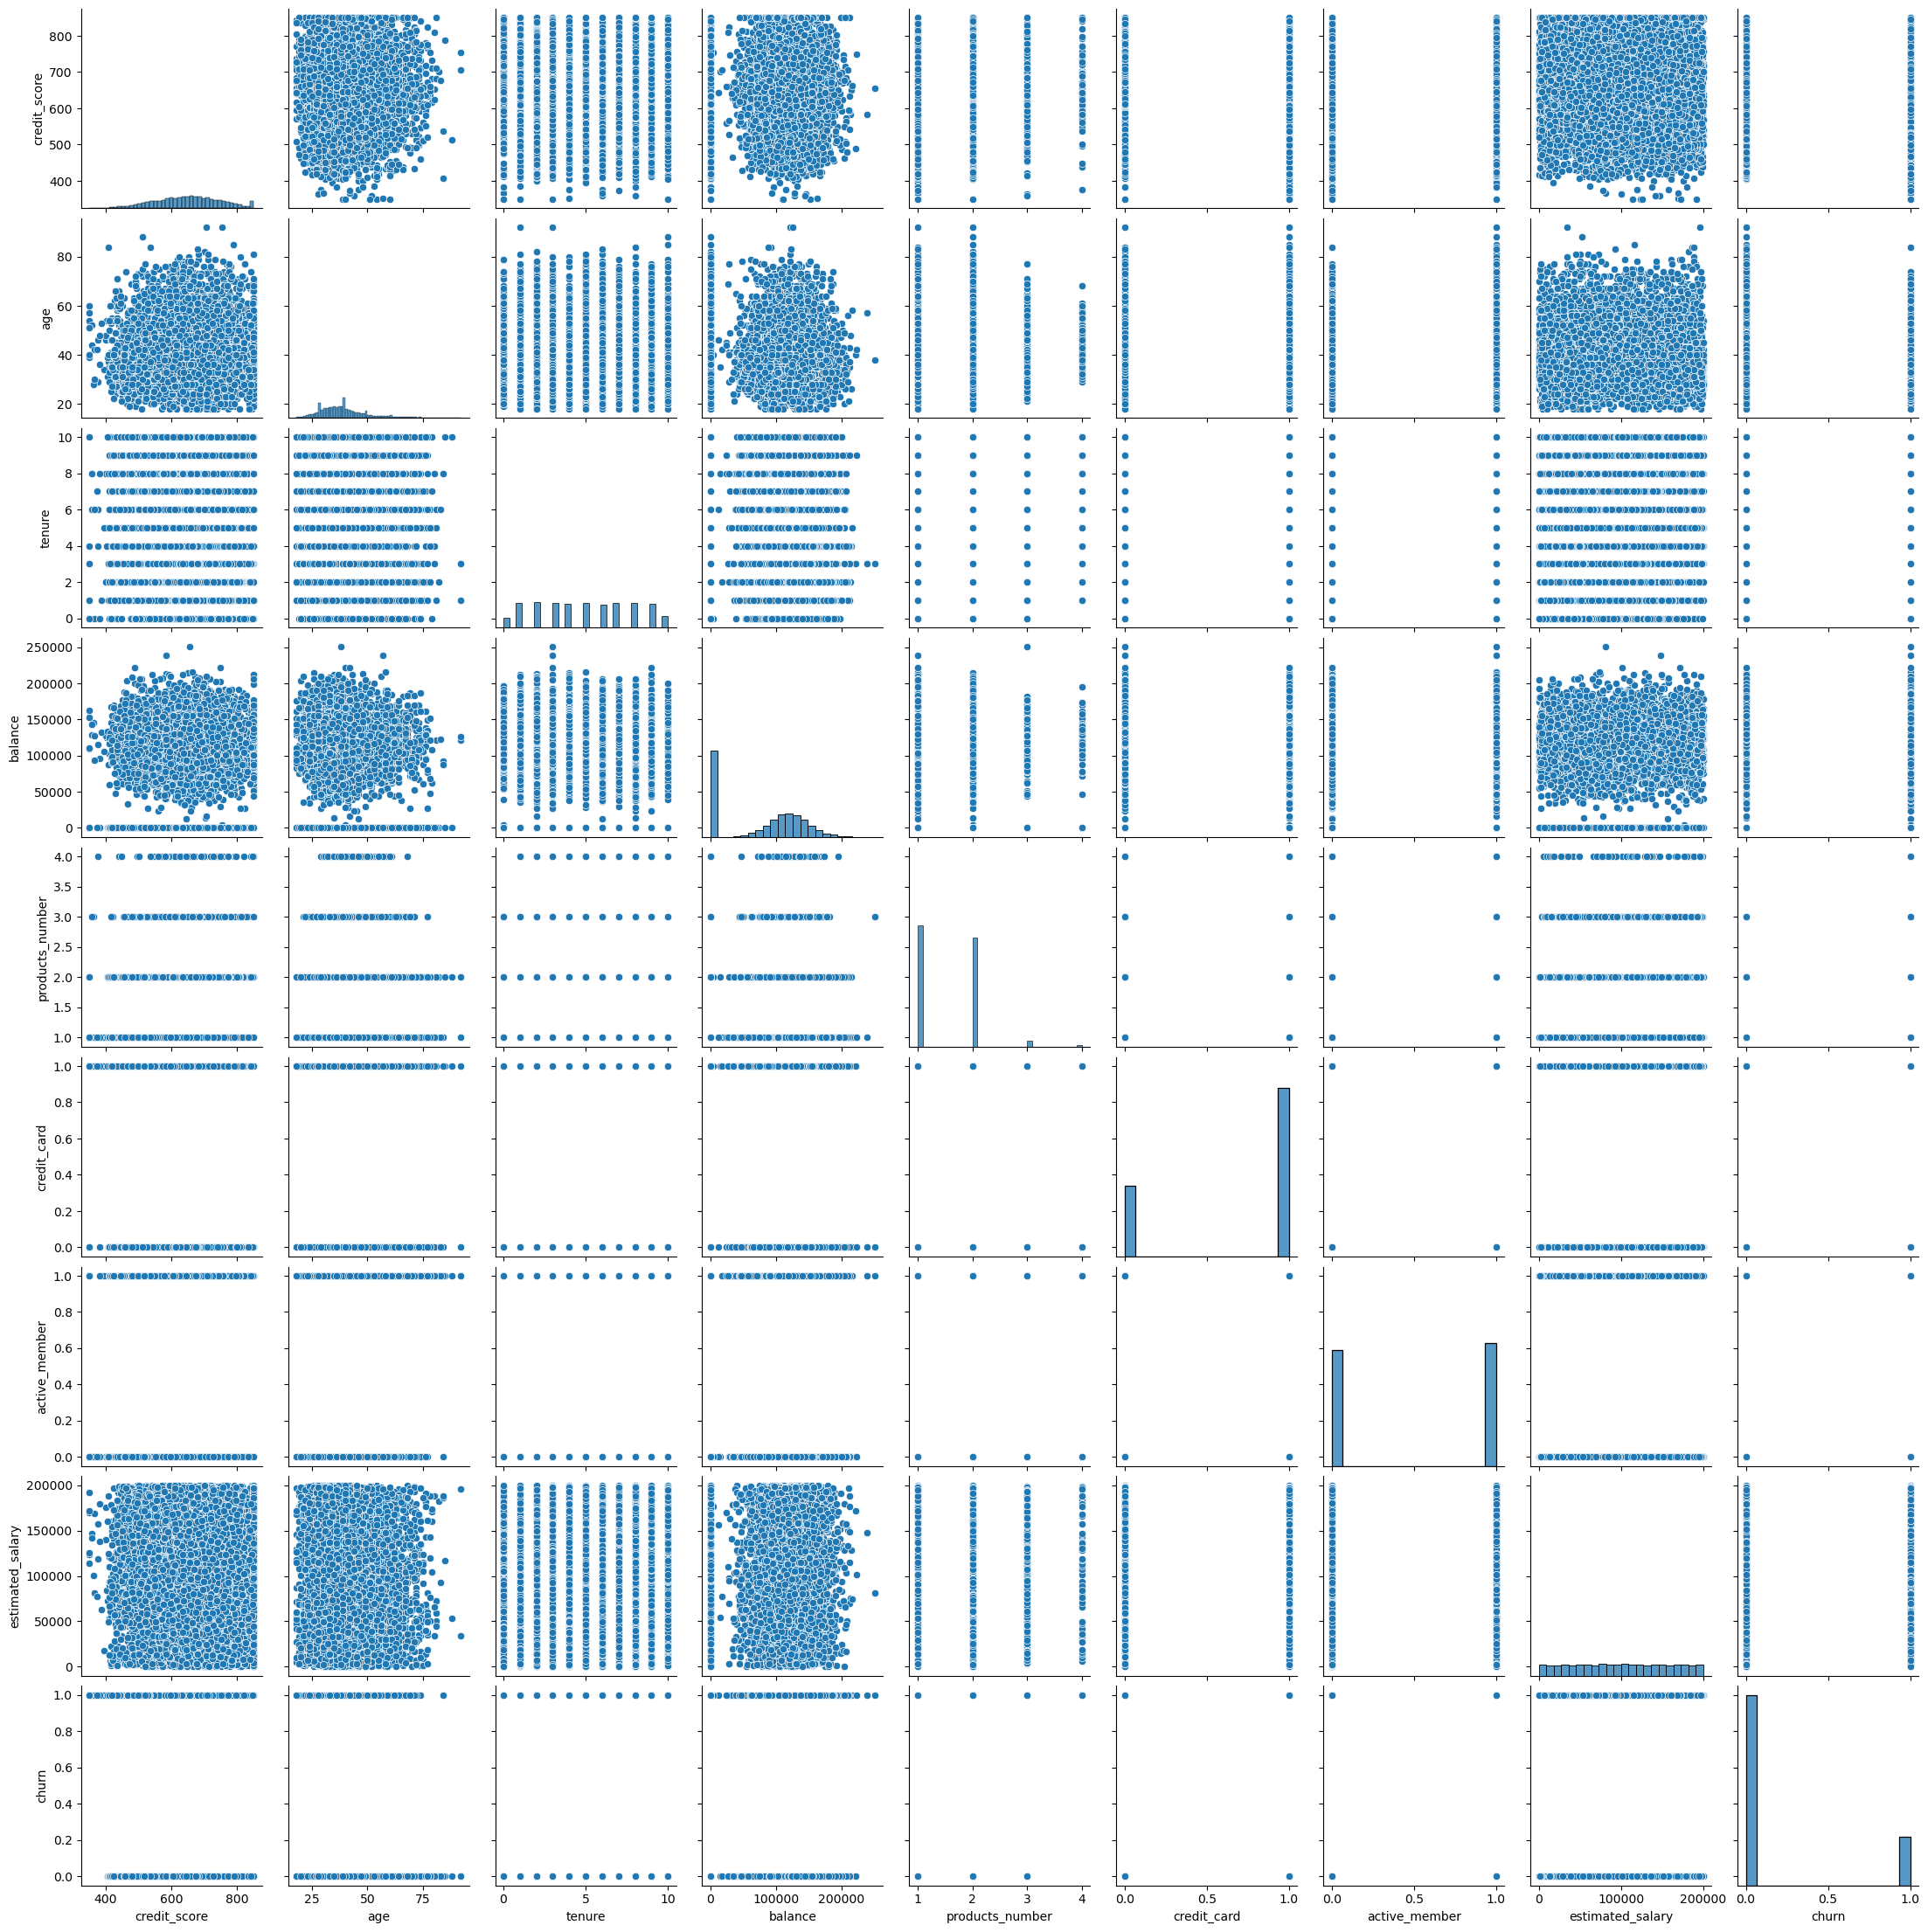

In [66]:
sns.pairplot(df)
plt.show()

Estimated salary does not seem highly coorelated with churn, or any other variables.


In [67]:
correlation_coefficient = df['estimated_salary'].corr(df['churn'])
print(correlation_coefficient)

0.012096861026844652


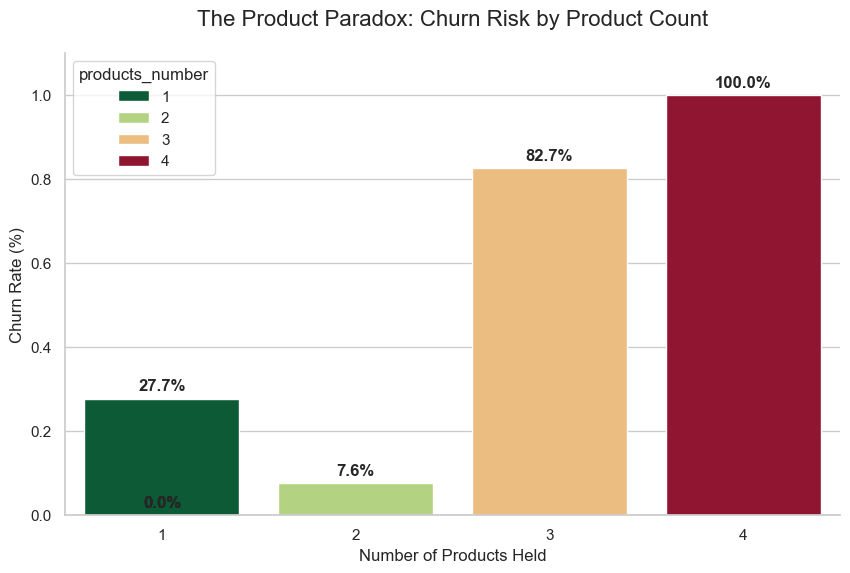

In [98]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='products_number', 
    y='churn', 
    data=df,
    hue= 'products_number',
    palette='RdYlGn_r',
    errorbar=None  # Removes the little black confidence interval lines for a cleaner look
)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12, fontweight='bold')

# Titles and Labels
plt.title("The Product Paradox: Churn Risk by Product Count", fontsize=16, pad=20)
plt.ylabel("Churn Rate (%)", fontsize=12)
plt.xlabel("Number of Products Held", fontsize=12)
plt.ylim(0, 1.1) # add space at the top for the labels

sns.despine() # Removes the top and right border
plt.show()

In [88]:
print(df['products_number'].value_counts().sort_index())

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

ROC-AUC Score: 0.8559965861822719


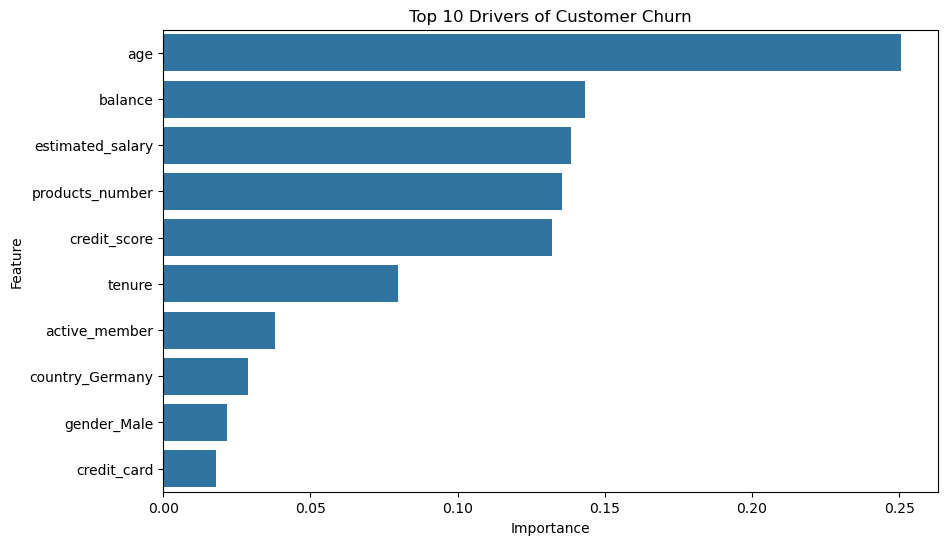

In [55]:
# Convert Categorical to Dummies (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# 3. Handle Class Imbalance
# (Tip: Check if the churn rate is low; if so, emphasize this in your README)
X = df.drop('churn', axis=1) # 'churn' is the target
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modeling (Using Random Forest for high interpretability)
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 5. Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

# 6. Feature Importance (The "Insight" Generator)
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Drivers of Customer Churn')
plt.show()

In [ ]:
# Calculate the correlation of all numeric features with Churn
correlations = df.corr()['churn'].sort_values(ascending=False)
print(correlations)

churn               1.000000
age                 0.285323
country_Germany     0.173488
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
country_Spain      -0.052667
gender_Male        -0.106512
active_member      -0.156128
Name: churn, dtype: float64


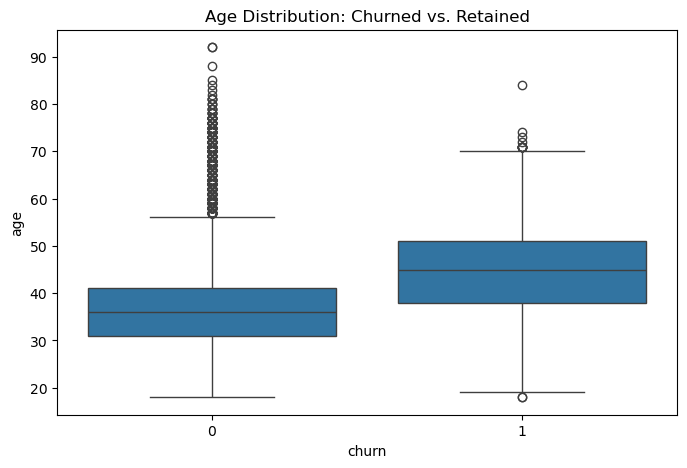

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='age', data=df)
plt.title('Age Distribution: Churned vs. Retained')
plt.show()